## DAY9 Merging, Joining, and Concatenating

将 DataFrame 组合在一起的主要方式有 3 种：

- Merging
- Joining
- Concatenating

下面来讨论这三种方法。

____

In [1]:
import pandas as pd

In [2]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [3]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=['A', 'B', 'C', 'D']) 

In [4]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [5]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [6]:
df2

,A,B,C,D
A,A4,B4,C4,D4
B,A5,B5,C5,D5
C,A6,B6,C6,D6
D,A7,B7,C7,D7


In [7]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


### 1. Concatenation

https://pandas.pydata.org/docs/reference/api/pandas.concat.html

```python
pandas.concat(objs, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)[source]
```

Concatenation 是将 DataFrame 粘合在一起。

注意：尺寸应该沿着您要连接的轴匹配。

可使用 **pd.concat** 并传入一个 DataFrame 列表以连接在一起

In [8]:
pd.concat([df1,df2,df3])
# 默认是axis=0 理解为 stack（上下合并）
# axis若为1，理解为side by side（左右合并）

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
A,A4,B4,C4,D4
B,A5,B5,C5,D5
C,A6,B6,C6,D6
D,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [9]:
pd.concat([df1,df2,df3],axis=0,ignore_index = True)
# 忽略index相当于reset_index

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [10]:
pd.concat([df1,df2,df3],axis=0, keys=['df1', 'df2','df3'])
# 如果我们想找到合并之前的df该怎么办？，加keys参数

A    B    C    D
df1 0    A0   B0   C0   D0
    1    A1   B1   C1   D1
    2    A2   B2   C2   D2
    3    A3   B3   C3   D3
df2 A    A4   B4   C4   D4
    B    A5   B5   C5   D5
    C    A6   B6   C6   D6
    D    A7   B7   C7   D7
df3 8    A8   B8   C8   D8
    9    A9   B9   C9   D9
    10  A10  B10  C10  D10
    11  A11  B11  C11  D11

In [11]:
(pd.concat([df1,df2,df3],axis=0, keys=['df1', 'df2','df3'])).loc['df1']
# .loc['df1']定位df1，并取出

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [12]:
pd.concat([df1,df2,df3],axis=1)
# side by side
# 发现一堆nan
# 为什么？

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [13]:
# 因为index没对齐，所以我们把index对齐即可
pd.concat(
    [df1.reset_index(drop=True),
     df2.reset_index(drop=True),
     df3.reset_index(drop=True)],axis=1
)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


## Merging

**merge** 函数与将 SQL 表合并在一起的类似逻辑将 DataFrame 合并在一起

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

```python
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
```

In [14]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    

In [15]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [16]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [17]:
pd.merge(left,right,how='inner',on='key')

# sql 的 inner join
# 用 key 这一列连接

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [18]:
# 多个key
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [19]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [20]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [21]:
pd.merge(left, right, on=['key1', 'key2'])
# 相当于key1 key2连一起看，如果相等就取出对应的行

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [22]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])
# full outer join

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [23]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [24]:
left = pd.DataFrame({'col1': [-1, 1, 2, 4], 'col_left':['a','b','c','d']})
right = pd.DataFrame({'col1': [1, 2, 2, 6],'col_right':[2, 3, 4, 5]})
pd.merge(left, right, on='col1', how='outer', indicator=True)

,col1,col_left,col_right,_merge
0,-1,a,NaN,left_only
1,1,b,2.0,both
2,2,c,3.0,both
3,2,c,4.0,both
4,4,d,NaN,left_only
5,6,NaN,5.0,right_only


## Joining

Joining 是将两个可能具有不同索引的 DataFrame 的列组合成单个 DataFrame 的便捷方法

In [25]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [26]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [27]:
left.join(right, 
          how='outer', 
          lsuffix = '_左',
          rsuffix = '_右')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


### 习题

In [28]:
url1 = 'https://github.com/anyone-can-cook/rclass1/raw/master/data/nls72/nls72stu_percontor_vars.dta'
df1 = pd.read_stata(url1,
                    columns = ['id', 'schcode', 'bysex', 'csex', 'crace', 'cbirthm', 'cbirthd', 'cbirthyr'])

In [29]:
url2 = 'https://github.com/ozanj/rclass/raw/master/data/nls72/nls72petsstu_v2.dta'
df2 = pd.read_stata(url2,
                    columns = ['id','reqtrans','numtrans'])

In [30]:
url3 = 'https://github.com/ozanj/rclass/raw/master/data/nls72/nls72petstrn_v2.dta'
df3 = pd.read_stata(url3,
                   columns = 'id, transnum, findisp, trnsflag, terms, fice, state, cofcon, instype, itype'.split(', '))

In [31]:
url4 = 'https://github.com/ozanj/rclass/raw/master/data/nls72/nls72petstrm_v2.dta'
df4 = pd.read_stata(url4,
                   columns = 'id, transnum, termnum, courses, termtype, season, sortdate, gradcode, transfer'.split(', '))

In [32]:
def view(df):
    return pd.concat([df.head(),df.tail()])

In [33]:
view(df1)

,id,schcode,bysex,csex,crace,cbirthm,cbirthd,cbirthyr
0,18,3000,2. female,1. male,4. PUERTO RICAN,12,9,53
1,67,3000,1. male,1. male,2. black,10,14,53
2,83,2518,2. female,2. female,7. white,3,10,54
3,174,2911,1. male,1. male,7. white,5,11,54
4,190,800,2. female,2. female,7. white,1,5,55
22647,899807,7887,99. {LEGITIMATE SKIP},2. female,7. white,12,6,54
22648,899823,9653,99. {LEGITIMATE SKIP},2. female,7. white,6,26,54
22649,899831,6603,99. {LEGITIMATE SKIP},2. female,99. {LEGITIMATE SKIP},12,24,54
22650,899906,2643,99. {LEGITIMATE SKIP},1. male,7. white,12,7,53
22651,899963,7160,99. {LEGITIMATE SKIP},1. male,7. white,7,18,54


In [34]:
view(df2)

,id,reqtrans,numtrans
0,18,1,0
1,67,1,1
2,83,1,0
3,315,2,2
4,414,1,0
14754,899773,1,0
14755,899823,3,2
14756,899831,1,1
14757,899906,2,0
14758,899963,1,0


In [35]:
view(df3)

,id,transnum,findisp,trnsflag,terms,fice,state,cofcon,instype,itype
0,18,1,6. NO RESPONSE FROM SCHOOL,0. DUMMY TRANSCRIPT,99,1009,1,6. PUBLIC 4-YEAR,3. PUBLIC 4-YEAR,1. Research & Doctoral
1,67,1,1. TRANSCRIPT RECEIVED,1. REQUESTED & RECEIVED,8,5694,1,2. PUBLIC < 2-YEAR,1. proprietary,5. Less than 2-year
2,83,1,3. STUDENT NEVER ATTENDED,0. DUMMY TRANSCRIPT,99,1166,5,4. PUBLIC 2-YEAR,4. PUBLIC 2-YEAR,4. 2-year
3,315,1,1. TRANSCRIPT RECEIVED,1. REQUESTED & RECEIVED,20,1009,1,6. PUBLIC 4-YEAR,3. PUBLIC 4-YEAR,1. Research & Doctoral
4,315,2,1. TRANSCRIPT RECEIVED,1. REQUESTED & RECEIVED,1,1057,1,6. PUBLIC 4-YEAR,3. PUBLIC 4-YEAR,2. Comprehensive
24248,899823,3,1. TRANSCRIPT RECEIVED,1. REQUESTED & RECEIVED,2,7333,19,2. PUBLIC < 2-YEAR,1. proprietary,5. Less than 2-year
24249,899831,1,1. TRANSCRIPT RECEIVED,1. REQUESTED & RECEIVED,12,2518,26,6. PUBLIC 4-YEAR,3. PUBLIC 4-YEAR,1. Research & Doctoral
24250,899906,1,3. STUDENT NEVER ATTENDED,0. DUMMY TRANSCRIPT,99,2516,26,6. PUBLIC 4-YEAR,3. PUBLIC 4-YEAR,1. Research & Doctoral
24251,899906,2,3. STUDENT NEVER ATTENDED,0. DUMMY TRANSCRIPT,99,3185,37,5. PRIVATE NFP 4-YEAR,2. PRIVATE NFP,2. Comprehensive
24252,899963,1,3. STUDENT NEVER ATTENDED,0. DUMMY TRANSCRIPT,99,7850,44,1. proprietary,1. proprietary,5. Less than 2-year


In [36]:
view(df4)

,id,transnum,termnum,courses,termtype,season,sortdate,gradcode,transfer
0,67,1,1,3,4. quarter,2. winter,8101,1. LETTER GRADES,0. NOT TRANSFER
1,67,1,2,2,4. quarter,3. spring,8104,1. LETTER GRADES,0. NOT TRANSFER
2,67,1,3,2,4. quarter,1. fall,8109,1. LETTER GRADES,0. NOT TRANSFER
3,67,1,4,2,4. quarter,2. winter,8201,1. LETTER GRADES,0. NOT TRANSFER
4,67,1,5,2,4. quarter,3. spring,8204,1. LETTER GRADES,0. NOT TRANSFER
120880,899831,1,8,5,2. semester,3. spring,7601,1. LETTER GRADES,0. NOT TRANSFER
120881,899831,1,9,2,2. semester,4. summer,7606,1. LETTER GRADES,0. NOT TRANSFER
120882,899831,1,10,5,2. semester,1. fall,7609,1. LETTER GRADES,0. NOT TRANSFER
120883,899831,1,11,6,2. semester,3. spring,7701,1. LETTER GRADES,0. NOT TRANSFER
120884,899831,1,12,2,2. semester,1. fall,8009,1. LETTER GRADES,0. NOT TRANSFER


In [37]:
pd.merge(df1,df2,on = 'id',how = 'left').query('reqtrans.isnull() and numtrans.isnull()')

,id,schcode,bysex,csex,crace,cbirthm,cbirthd,cbirthyr,reqtrans,numtrans
3,174,2911,1. male,1. male,7. white,5,11,54,NaN,NaN
4,190,800,2. female,2. female,7. white,1,5,55,NaN,NaN
5,232,7507,2. female,2. female,7. white,7,8,54,NaN,NaN
7,380,9516,1. male,1. male,7. white,10,24,53,NaN,NaN
10,497,2892,99. {LEGITIMATE SKIP},1. male,7. white,6,11,54,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
22639,899492,2753,99. {LEGITIMATE SKIP},2. female,2. black,2,27,51,NaN,NaN
22640,899500,480,99. {LEGITIMATE SKIP},1. male,7. white,3,22,54,NaN,NaN
22641,899559,2533,99. {LEGITIMATE SKIP},1. male,7. white,6,22,53,NaN,NaN
22645,899757,7696,99. {LEGITIMATE SKIP},2. female,2. black,8,18,54,NaN,NaN


In [38]:
res = pd.merge(df1,df2,on = 'id',how = 'outer', indicator = True).query('_merge == "left_only"').drop('_merge',axis=1)

In [39]:
res

,id,schcode,bysex,csex,crace,cbirthm,cbirthd,cbirthyr,reqtrans,numtrans
3,174,2911,1. male,1. male,7. white,5,11,54,NaN,NaN
4,190,800,2. female,2. female,7. white,1,5,55,NaN,NaN
5,232,7507,2. female,2. female,7. white,7,8,54,NaN,NaN
7,380,9516,1. male,1. male,7. white,10,24,53,NaN,NaN
10,497,2892,99. {LEGITIMATE SKIP},1. male,7. white,6,11,54,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
22639,899492,2753,99. {LEGITIMATE SKIP},2. female,2. black,2,27,51,NaN,NaN
22640,899500,480,99. {LEGITIMATE SKIP},1. male,7. white,3,22,54,NaN,NaN
22641,899559,2533,99. {LEGITIMATE SKIP},1. male,7. white,6,22,53,NaN,NaN
22645,899757,7696,99. {LEGITIMATE SKIP},2. female,2. black,8,18,54,NaN,NaN


In [40]:
res.query("crace.str.startswith('7') \
           and csex.str.contains('1') \
           and schcode % 2 == 0",engine='python')

,id,schcode,bysex,csex,crace,cbirthm,cbirthd,cbirthyr,reqtrans,numtrans
7,380,9516,1. male,1. male,7. white,10,24,53,NaN,NaN
10,497,2892,99. {LEGITIMATE SKIP},1. male,7. white,6,11,54,NaN,NaN
12,554,1704,1. male,1. male,7. white,5,28,54,NaN,NaN
26,1255,1444,1. male,1. male,7. white,8,25,54,NaN,NaN
31,1560,3000,1. male,1. male,7. white,6,19,53,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
22541,894428,3786,99. {LEGITIMATE SKIP},1. male,7. white,98,98,98,NaN,NaN
22592,897371,1820,99. {LEGITIMATE SKIP},1. male,7. white,1,17,53,NaN,NaN
22604,897983,2568,99. {LEGITIMATE SKIP},1. male,7. white,2,12,54,NaN,NaN
22606,898064,7216,99. {LEGITIMATE SKIP},1. male,7. white,6,28,52,NaN,NaN


In [41]:
res.query("crace.str.startswith('7') \
           and csex.str.contains('1') \
           and schcode % 2 == 0",engine='python')['cbirthm'].\
value_counts().sort_index().rename({98:'unknown'})

1          121
2          103
3          110
4           87
5           97
6          104
7          120
8          142
9          125
10         109
11         108
12         119
unknown     10
Name: cbirthm, dtype: int64

<AxesSubplot:>

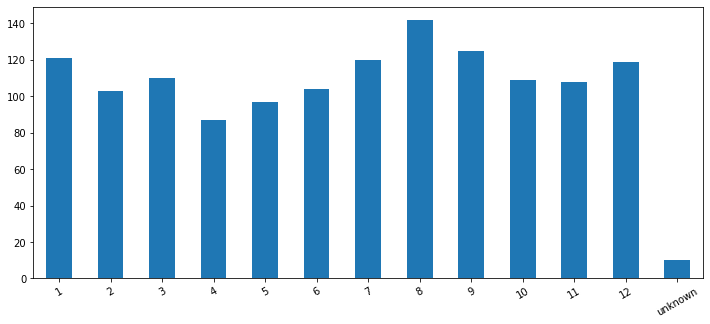

In [42]:
res.query("crace.str.startswith('7') \
           and csex.str.contains('1') \
           and schcode % 2 == 0",engine='python')['cbirthm'].\
value_counts().sort_index().rename({98:'unknown'}).plot(kind = 'bar',rot = 30,figsize = [12,5])